In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv("Boston.csv")

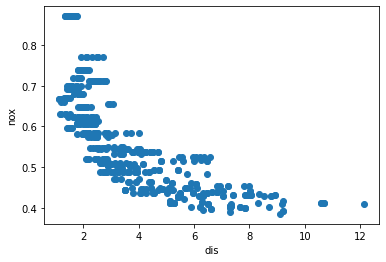

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

X = pd.DataFrame(data['dis'])
y = data['nox']

plt.xlabel("dis")
plt.ylabel("nox")

plt.scatter(X, y)

In [5]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
poly = PolynomialFeatures(3)
polyX = pd.DataFrame(poly.fit_transform(X))

polyFit = lm.fit(polyX, y, )


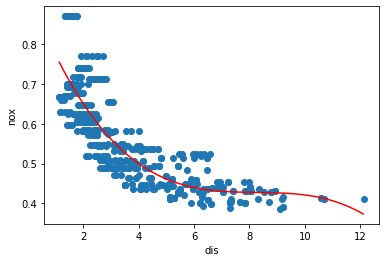

In [6]:
xRange = pd.DataFrame(np.arange(min(X['dis']), max(X['dis']), (max(X['dis']) - min(X['dis'])) / len(X['dis'])))
polyXRange = poly.fit_transform(xRange)
yPolyPredict = polyFit.predict(polyXRange)

plt.xlabel("dis")
plt.ylabel("nox")
plt.scatter(X,y)
plt.plot(xRange.iloc[:, 0], yPolyPredict, 'r')

In [ ]:
print(polyFit.intercept_)
print(polyFit.coef_)

0.9341280720211882
[ 0.         -0.18208169  0.02192766 -0.000885  ]


AttributeError: ignored

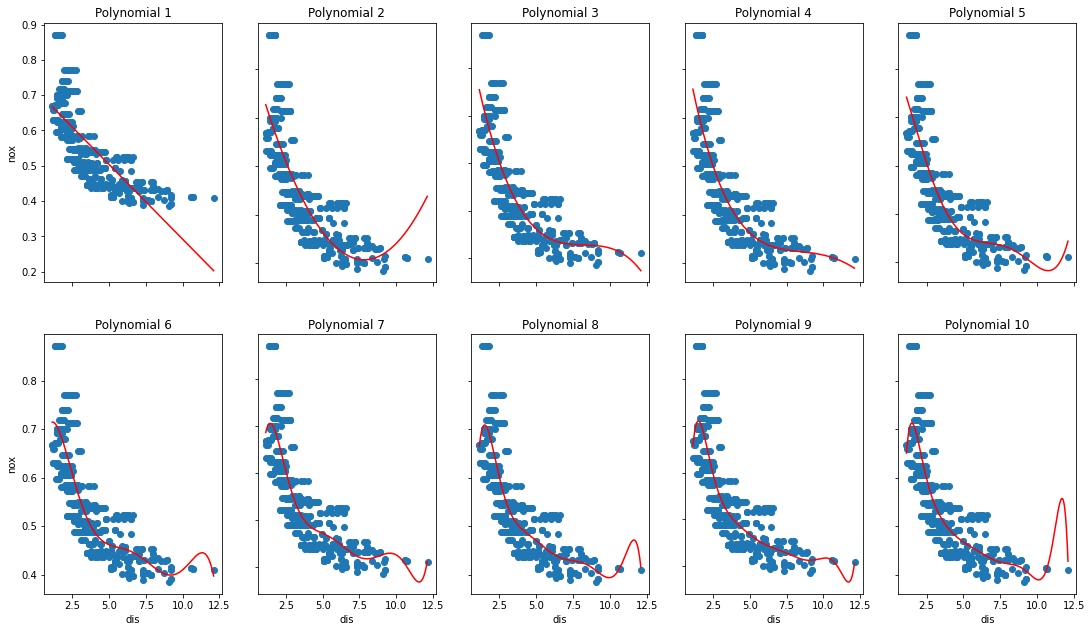

In [ ]:
from sklearn.metrics import mean_squared_error
import math

fig, axs = plt.subplots(2, 5)
fig.set_size_inches(18.5, 10.5)

poly_scores = []

for a in np.arange(1,11):
  poly = PolynomialFeatures(a)
  polyX = pd.DataFrame(poly.fit_transform(X))

  predictions = lm.fit(polyX, y).predict(polyX)
  #we need RSS
  RSS = len(X['dis']) * mean_squared_error(y, predictions)

  poly_scores.append(RSS)

  xRange = pd.DataFrame(np.arange(min(X['dis']), max(X['dis']), (max(X['dis']) - min(X['dis'])) / len(X['dis'])))
  polyXRange = poly.fit_transform(xRange)
  yPolyPredict = polyFit.predict(polyXRange)

  axs[(a-1)//5, (a-1)%5].scatter(X, y)
  axs[(a-1)//5, (a-1)%5].plot(xRange.iloc[:, 0], yPolyPredict, 'r')

  axs[(a-1)//5, (a-1)%5].set_title('Polynomial ' + str(a))
for ax in axs.flat:
    ax.set(xlabel='dis', ylabel='nox')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

[2.768562858969276, 2.0352618689352564, 1.9341067071790705, 1.9329813272985938, 1.9152899610843037, 1.878257298508164, 1.849483614582971, 1.8356296890678305, 1.8333308045166714, 1.832171125206099]


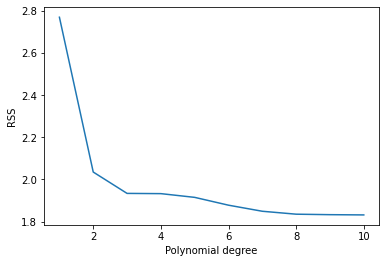

In [ ]:
plt.xlabel("Polynomial degree")
plt.ylabel("RSS")

plt.plot(range(1,11), poly_scores)
print(poly_scores)

In [ ]:
from sklearn.model_selection import KFold 

k = 10

kf = KFold(n_splits=k)

poly_scores = []
poly_best_degree = 0
poly_best_score = np.inf

for a in np.arange(1,11):
  poly = PolynomialFeatures(a)
  polyX = pd.DataFrame(poly.fit_transform(X))

  CVsum = 0
  for train_indices, test_indices in kf.split(polyX, y):
    predictions = lm.fit(polyX.iloc[train_indices], y[train_indices]).predict(polyX.iloc[test_indices])
    #we need RSS
    RSS = len(test_indices) * mean_squared_error(y[test_indices], predictions)
    CVsum = CVsum + RSS

  CV = CVsum / k
  poly_scores.append(CV)

  if CV < poly_best_score:
    poly_best_score = CV
    poly_best_degree = a

Best degree is: 
3


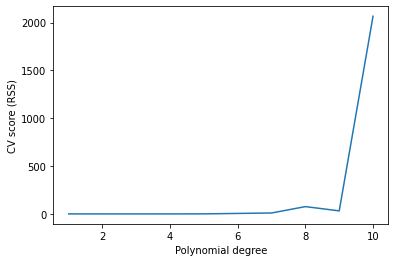

In [ ]:
plt.xlabel("Polynomial degree")
plt.ylabel("CV score (RSS)")

plt.plot(range(1,11), poly_scores)

print("Best degree is: ")
print(poly_best_degree)

In [ ]:
poly_scores

[0.3086986028415309,
 0.22437727283744913,
 0.21340716353990144,
 0.2889294236452612,
 0.6772229330892072,
 5.286048749993487,
 9.979728686417271,
 76.6308587840082,
 31.987515911498594,
 2065.796070121172]

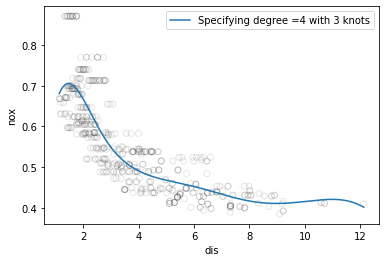

In [ ]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generating cubic spline with 3 knots at 3 and 7
transformed_x = dmatrix("bs(X['dis'], knots=(3,7), degree=4, include_intercept=False)", {"train": X['dis']},return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
spline_fit = sm.GLM(y, transformed_x).fit()

# We will plot the graph for 70 observations only
xp = np.linspace(X['dis'].min(),X['dis'].max(), len(X['dis']))

# Make some predictions
spline_predictions = spline_fit.predict(dmatrix("bs(xp,  knots=(3,7), degree=4, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(X, y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree =4 with 3 knots')
plt.legend()
plt.xlabel('dis')
plt.ylabel('nox')
plt.show()

In [ ]:
spline_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    nox   No. Observations:                  506
Model:                            GLM   Df Residuals:                      499
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                       0.0036966
Method:                          IRLS   Log-Likelihood:                 702.43
Date:                Mon, 06 Dec 2021   Deviance:                       1.8446
Time:                        02:42:09   Pearson chi2:                     1.84
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            0.6808      0.019     35.551      0.000       0.643       0.718
bs(X['dis'], knots=(3, 7), degree=4, include_intercept=False)[0]     0.0753      0.030      2.495      0.013       0.016       0.134
bs(X['dis'], knots=(3, 7), degree=4, include_intercept=False)[1]    -0.2441      0.023    -10.476      0.000      -0.290      -0.198
bs(X['dis'], knots=(3, 7), degree=4, include_intercept=False)[2]    -0.1527      0.056     -2.740      0.006      -0.262      -0.043
bs(X['dis'], knots=(3, 7), degree=4, include_intercept=False)[3]    -0.3459      0.057     -6.036      0.000      -0.458      -0.234
bs(X['dis'], knots=(3, 7), degree=4, include_intercept=False)[4]    -0.2277      0.070     -3.236      0.001      -0.366      -0.090
bs(X['dis'], knots=(3, 7), degree=4, include_intercept=False)[5]    -0.2792      0.062     -4.540      0.000      -0.400      -0.159
====================================================================================================================================
"""

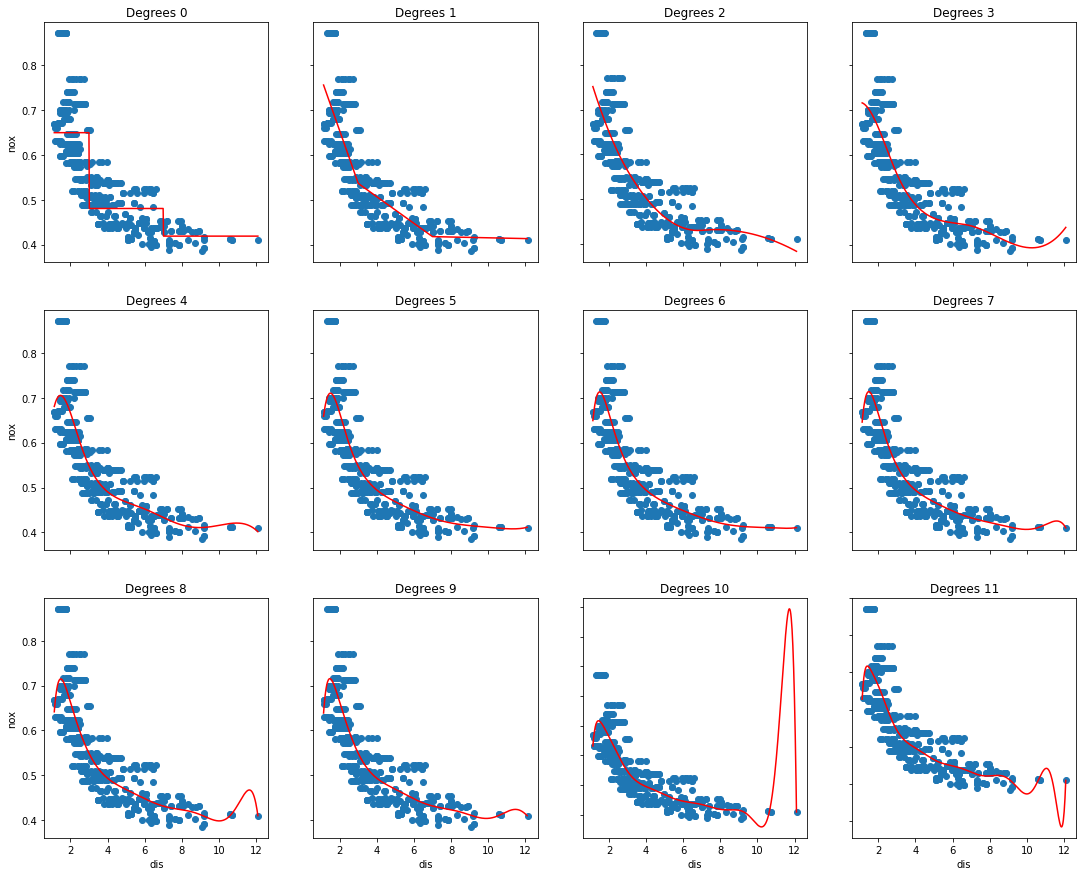

In [ ]:
from sklearn.metrics import mean_squared_error
import math

fig, axs = plt.subplots(3, 4)
fig.set_size_inches(18.5, 15)

spline_scores = []
maxNumDegrees = 12

for a in np.arange(0,maxNumDegrees):
  # Generating cubic spline with 3 knots at 3 and 7
  transformed_x = dmatrix("bs(train, knots=(3,7), degree="+str(a)+", include_intercept=False)", {"train": X['dis']},return_type='dataframe')

  # Fitting Generalised linear model on transformed dataset
  spline_fit = sm.GLM(y, transformed_x).fit()

  # We will plot the graph for 70 observations only
  xp = np.linspace(X['dis'].min(),X['dis'].max(), len(X['dis']))

  # Make some predictions
  spline_predictions = spline_fit.predict(dmatrix("bs(train,  knots=(3,7), degree="+str(a)+", include_intercept=False)", {"train": X['dis']}, return_type='dataframe'))

  #we need RSS
  RSS = len(X['dis']) * mean_squared_error(y, spline_predictions)
  spline_scores.append(RSS)
  ySplinePredict = spline_fit.predict(dmatrix("bs(xRange,  knots=(3,7), degree="+str(a)+", include_intercept=False)", {"xRange": xRange}, return_type='dataframe'))

  
  axs[(a)//4, (a)%4].scatter(X, y)
  axs[(a)//4, (a)%4].plot(xRange.iloc[:, 0], ySplinePredict, 'r')
  axs[(a)//4, (a)%4].set_title('Degrees ' + str(a))

 
for ax in axs.flat:
    ax.set(xlabel='dis', ylabel='nox')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

[2.5247281883591177, 1.92072506480702, 1.9469257679514318, 1.882849524286999, 1.8445899533238388, 1.8347679418373368, 1.8324727064870916, 1.831070711727015, 1.8303023223656425, 1.830004473764256, 1.8269670361043449, 1.8266123416787878]


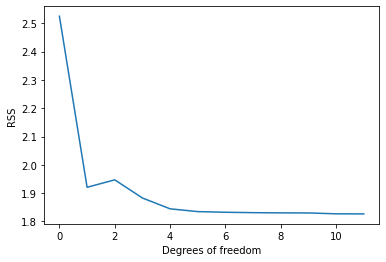

In [ ]:
plt.xlabel("Degrees of freedom")
plt.ylabel("RSS")

plt.plot(range(0,maxNumDegrees), spline_scores)
print(spline_scores)

In [ ]:
spline_scores = []
best_degrees = 0
step_spline_score = np.inf

kf = KFold(n_splits=k, random_state=40, shuffle=True)


for a in np.arange(0, maxNumDegrees):
  CVsum = 0
  for train_indices, test_indices in kf.split(X, y):
    X_train, X_test, y_train, y_test = X.iloc[train_indices], X.iloc[test_indices], y[train_indices], y[test_indices]
    
    # Generating cubic spline with 3 knots at 3 and 7
    transformed_x = dmatrix("bs(train, knots=(3,7), degree="+str(a)+", include_intercept=False)", {"train": X_train},return_type='dataframe')

    # Fitting Generalised linear model on transformed dataset
    spline_fit = sm.GLM(y_train, transformed_x).fit()

    # Make some predictions
    spline_predictions = spline_fit.predict(dmatrix("bs(X_test,  knots=(3,7),degree="+str(a)+", include_intercept=False)", {"X_test": X_test}, return_type='dataframe'))

    #we need RSS
    RSS = len(test_indices) * mean_squared_error(y[test_indices], spline_predictions)
    CVsum = CVsum + RSS

  CV = CVsum / k
  spline_scores.append(CV)

  if CV < step_spline_score:
    step_spline_score = CV
    best_degrees = a

Best degree is: 
1


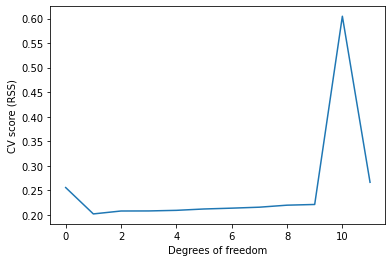

In [ ]:
plt.xlabel("Degrees of freedom")
plt.ylabel("CV score (RSS)")

plt.plot(range(0,maxNumDegrees), spline_scores)

print("Best degree is: ")
print(best_degrees)